# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Set seaborn style
sns.set(style="whitegrid")

# ---------------------Load Cleaned Dataset-----------------

In [2]:
data = pd.read_csv("cleaned_data.csv")

print("===== First 5 Rows (Cleaned Dataset) =====")
print(data.head())

print("\n===== Dataset Info =====")
print(data.info())

===== First 5 Rows (Cleaned Dataset) =====
   Customer Email  Customer Age  Customer Gender  Product Purchased  \
0            1084            32                2                 16   
1            1334            42                0                 21   
2            2580            48                2                 10   
3             741            27                0                 25   
4             740            67                0                  5   

  Date of Purchase  Ticket Type  Ticket Subject  Ticket Description  \
0       2021-03-22            4              13                3369   
1       2021-05-22            4              10                2004   
2       2020-07-14            4               8                 189   
3       2020-11-13            0               0                1971   
4       2020-02-04            0               3                 636   

   Ticket Status  Resolution  Ticket Priority  Ticket Channel  \
0              2           0          

# -------------Missing Value Heatmap-------------------

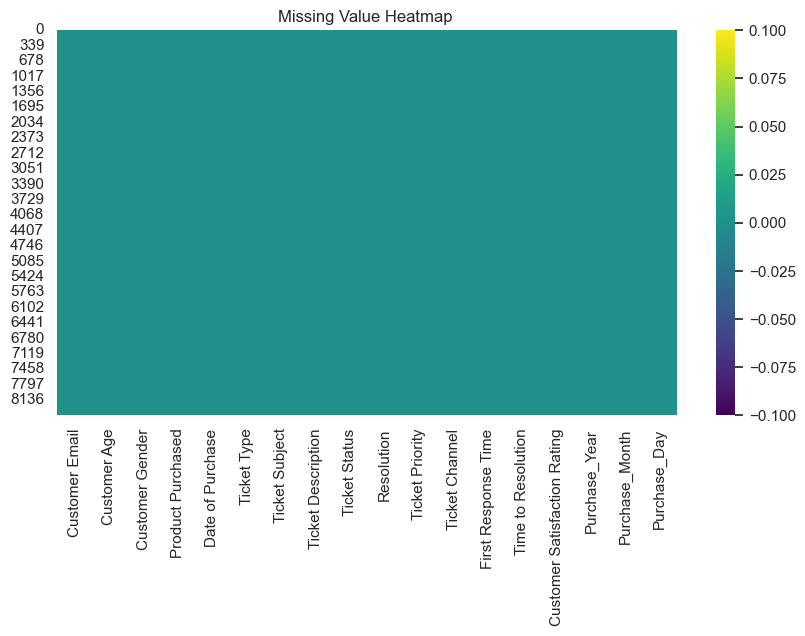

In [3]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar="False", cmap="viridis")
plt.title("Missing Value Heatmap ")
plt.show()

# --------------------Ticket Status Distribution -----------------------

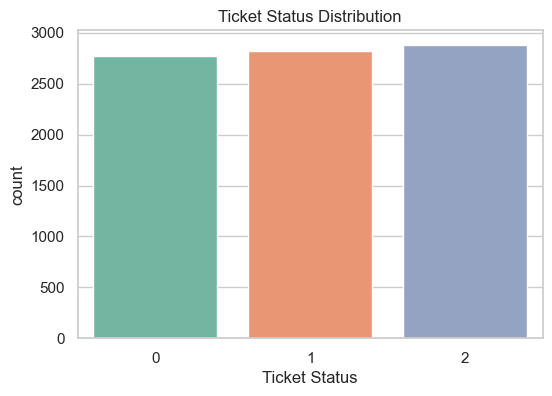

In [4]:
if "Ticket Status" in data.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Ticket Status", data=data, palette="Set2")
    plt.title("Ticket Status Distribution")
    plt.show()

# ---------------------Correlation Heatmap---------------------

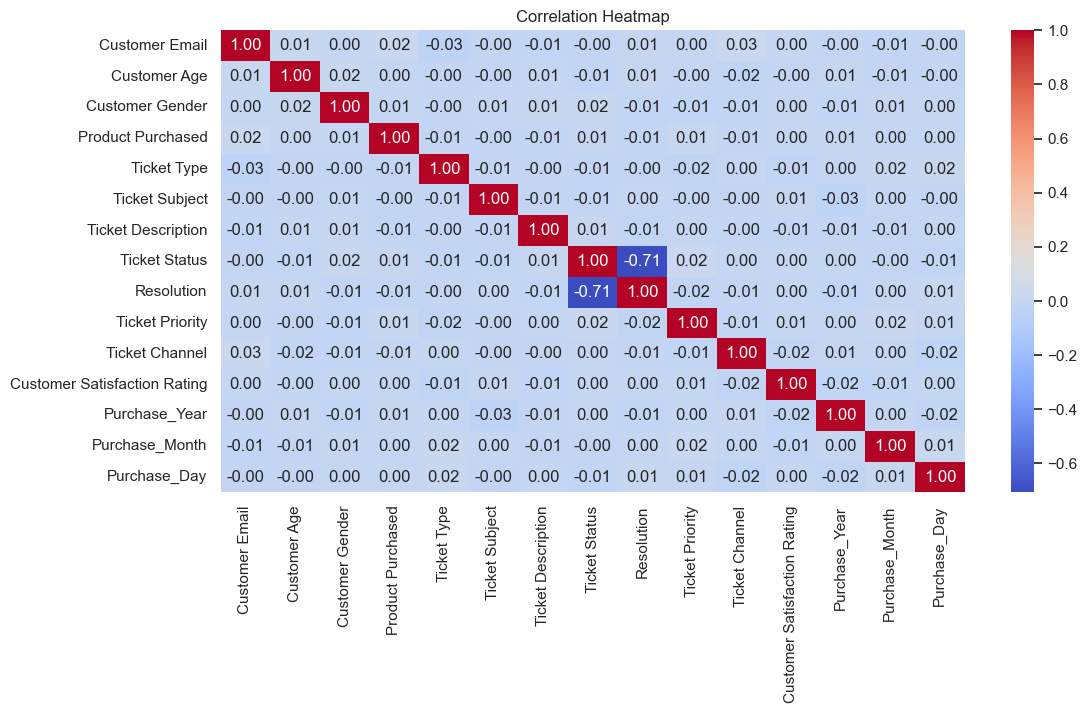

In [5]:
plt.figure(figsize=(12,6))
numeric_data = data.select_dtypes(include=["int64", "float64"])  # select only numbers
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Tickets by Year of Purchase

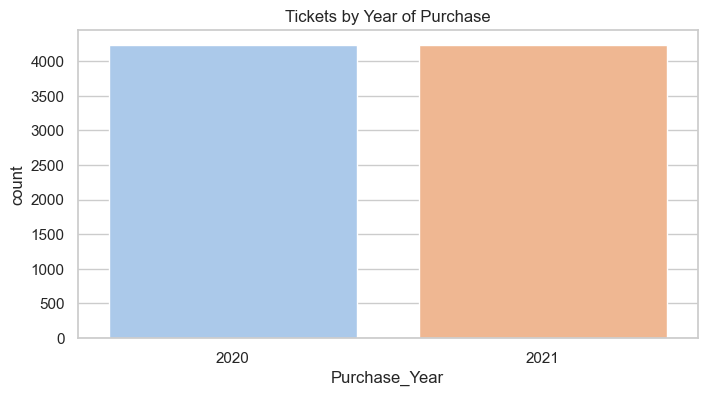

In [6]:
if "Purchase_Year" in data.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x="Purchase_Year", data=data, palette="pastel")
    plt.title("Tickets by Year of Purchase")
    plt.show()

# Tickets by Month of Purchase

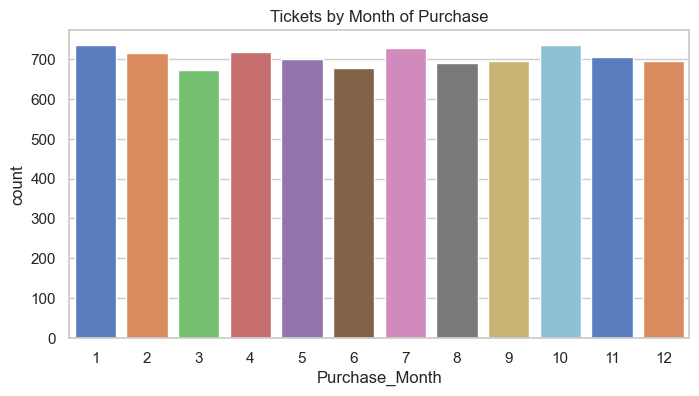

In [7]:
if "Purchase_Month" in data.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x="Purchase_Month", data=data, palette="muted")
    plt.title("Tickets by Month of Purchase")
    plt.show()

# --------------Customer Satisfaction by Ticket Channel---------------

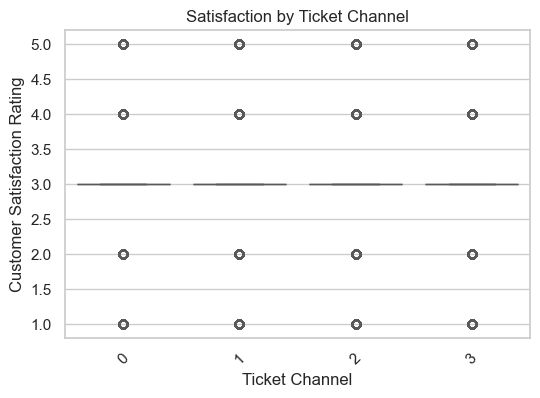

In [8]:
if "Ticket Channel" in data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Ticket Channel", y="Customer Satisfaction Rating", data=data, palette="Set2")
    plt.title("Satisfaction by Ticket Channel")
    plt.xticks(rotation=45)
    plt.show()


# ----------------- Customer Satisfaction by Ticket Type --------------------

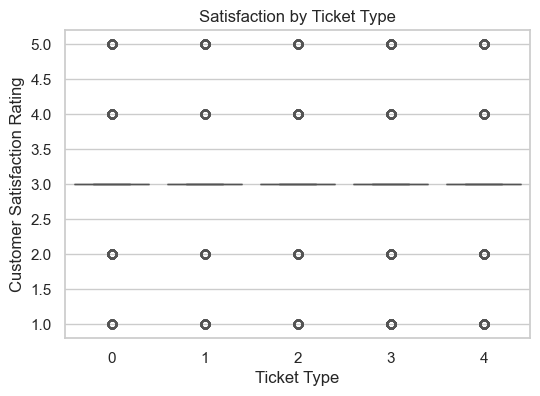

In [9]:
if "Ticket Type" in data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Ticket Type", y="Customer Satisfaction Rating", data=data, palette="muted")
    plt.title("Satisfaction by Ticket Type")
    plt.show()


# --------------- Customer Satisfaction by Gender -----------------

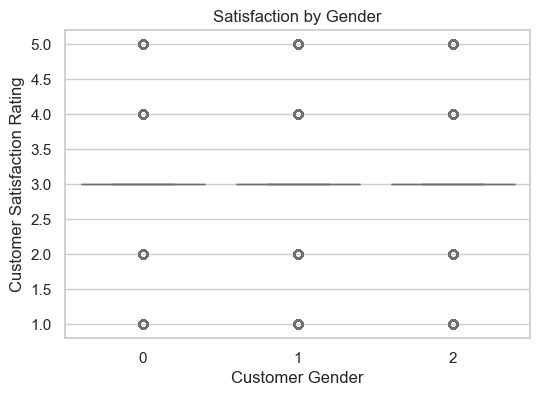

In [10]:
if "Customer Gender" in data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Customer Gender", y="Customer Satisfaction Rating", data=data, palette="pastel")
    plt.title("Satisfaction by Gender")
    plt.show()


#------------------- Customer Satisfaction by Age Group -----------------

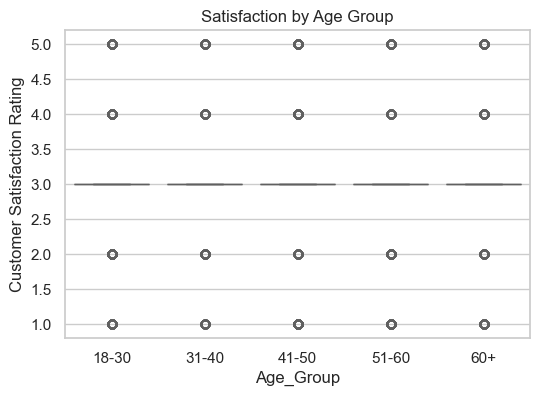

In [11]:
if "Customer Age" in data.columns:
    data["Age_Group"] = pd.cut(
        data["Customer Age"],
        bins=[18,30,40,50,60,100],
        labels=["18-30","31-40","41-50","51-60","60+"]
    )
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Age_Group", y="Customer Satisfaction Rating", data=data, palette="coolwarm")
    plt.title("Satisfaction by Age Group")
    plt.show()


# Effect of Response/Resolution Times on Satisfaction

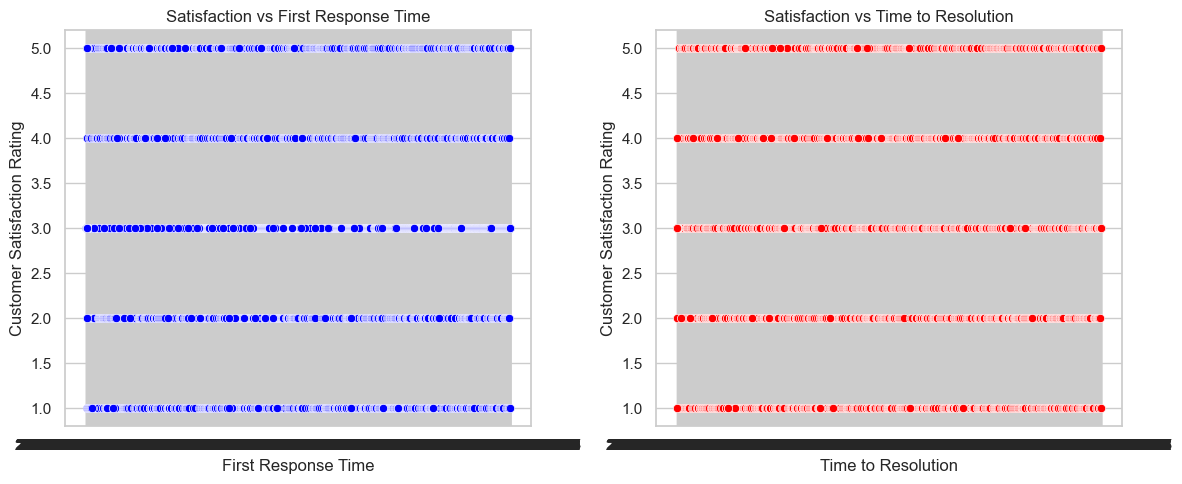

In [12]:
if "First Response Time" in data.columns and "Time to Resolution" in data.columns:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.scatterplot(x="First Response Time", y="Customer Satisfaction Rating", data=data, color="blue")
    plt.title("Satisfaction vs First Response Time")
    
    plt.subplot(1,2,2)
    sns.scatterplot(x="Time to Resolution", y="Customer Satisfaction Rating", data=data, color="red")
    plt.title("Satisfaction vs Time to Resolution")
    
    plt.tight_layout()
    plt.show()


# ----------------- Correlation Heatmap -----------------

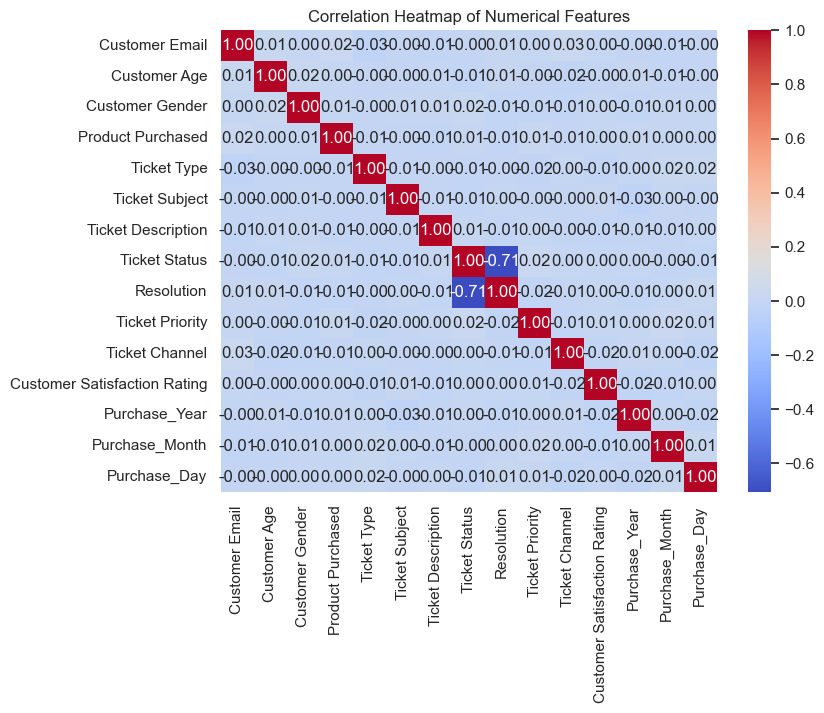

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Time Series / Trend Analysis

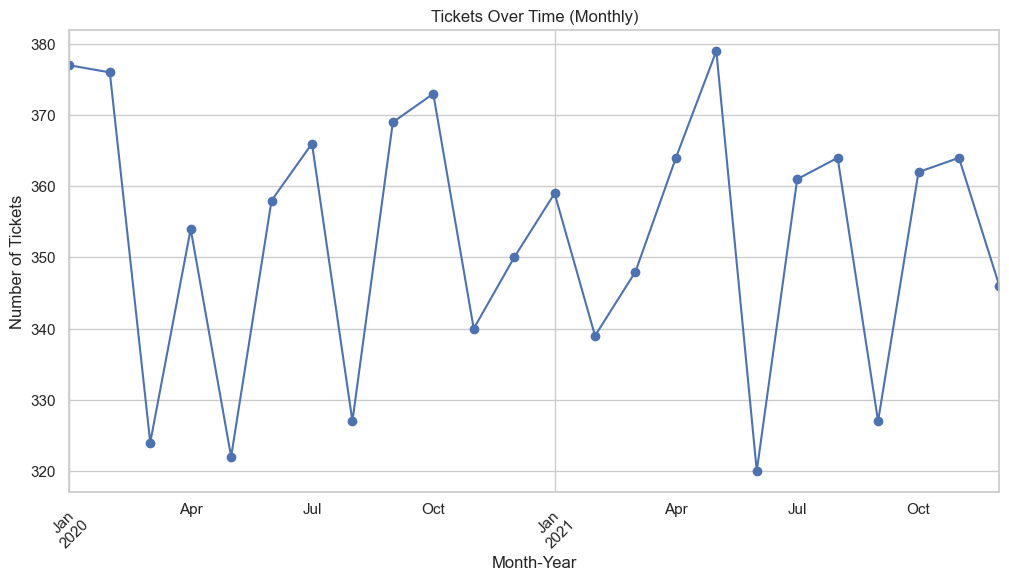

In [14]:
if "Date of Purchase" in data.columns:
    data["Purchase_Month_Year"] = pd.to_datetime(data["Date of Purchase"]).dt.to_period("M")
    plt.figure(figsize=(12,6))
    data["Purchase_Month_Year"].value_counts().sort_index().plot(kind="line", marker="o")
    plt.title("Tickets Over Time (Monthly)")
    plt.xlabel("Month-Year")
    plt.ylabel("Number of Tickets")
    plt.xticks(rotation=45)
    plt.show()


# Customer Satisfaction by Category

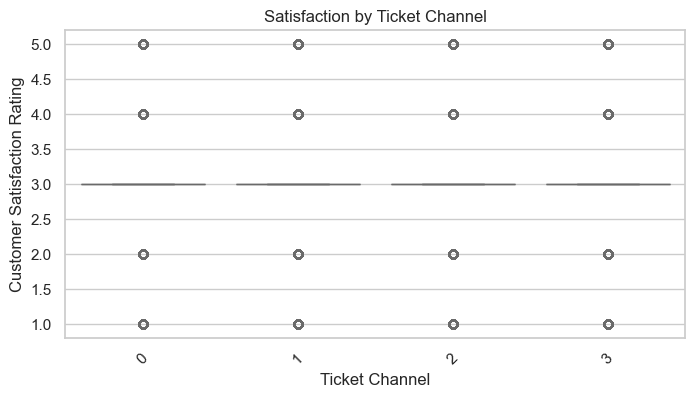

In [15]:
if "Ticket Channel" in data.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Ticket Channel", y="Customer Satisfaction Rating", data=data, palette="Set3")
    plt.title("Satisfaction by Ticket Channel")
    plt.xticks(rotation=45)
    plt.show()


 # Age Group Analysis

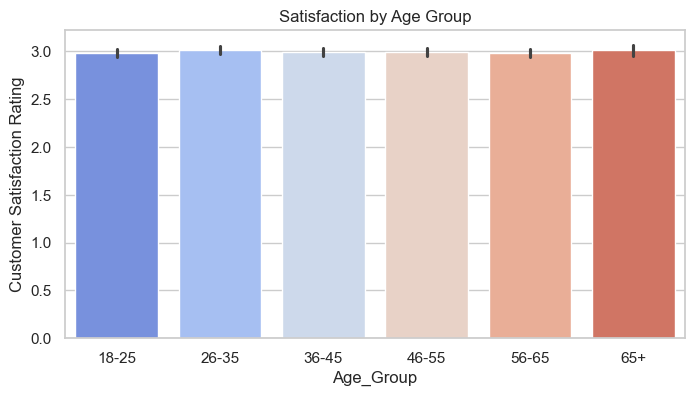

In [16]:
if "Customer Age" in data.columns:
    bins = [18, 25, 35, 45, 55, 65, 100]
    labels = ["18-25","26-35","36-45","46-55","56-65","65+"]
    data["Age_Group"] = pd.cut(data["Customer Age"], bins=bins, labels=labels)
    
    plt.figure(figsize=(8,4))
    sns.barplot(x="Age_Group", y="Customer Satisfaction Rating", data=data, palette="coolwarm")
    plt.title("Satisfaction by Age Group")
    plt.show()
